In [1]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
### 使用 networkx 包中的函数 LFR_benchmark_graph 生成随机图
import networkx as nx
from networkx.generators.community import LFR_benchmark_graph

n = 1000
tau1 = 2  # Power-law exponent for the degree distribution
tau2 = 1.1 # Power-law exponent for the community size distribution 
            #S hould be >1
mu = 0.1 # Mixing parameter
avg_deg = 25 # Average Degree
max_deg = int(0.1*n) # Max Degree
min_commu = 60 # Min Community Size
max_commu = int(0.1*n) # Max Community Size

G0 = LFR_benchmark_graph(
    n, tau1, tau2, mu, average_degree=avg_deg, max_degree=max_deg, min_community=min_commu, max_community=max_commu, 
    seed=7
)
### 去掉 G 中的重边和自环 
G0 = nx.Graph(G0) # Remove multi-edges

selfloop_edges = list(nx.selfloop_edges(G0)) # a list of self loops

G0.remove_edges_from(selfloop_edges) # Remove self-loops

In [3]:
import numpy as np
intrinsic_communities = {frozenset(G0.nodes[v]["community"]) for v in G0}
intrinsic_membership = np.empty(G0.number_of_nodes(), dtype=int)
for node in range(G0.number_of_nodes()):
    for index, inner_set in enumerate(intrinsic_communities):
        if node in inner_set:
            intrinsic_membership[node] = index
            break

In [16]:
import os
from datetime import date
def generate_output(disturb: bool, filename):
    # Generate the folder name with the current date
    if disturb:   
        folder_name = f"Graph_Rmv_Stoch_{date.today()}"
    else:
        folder_name = f"Graph_Rmv_Btwn_{date.today()}"

    # Create the output directory if it doesn't exist
    output_dir = os.path.join(os.getcwd(), folder_name)
    os.makedirs(output_dir, exist_ok=True)

    # Construct the full file path
    file_path = os.path.join(output_dir, filename)
    
    return file_path

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import StrMethodFormatter

def quar_plot(scores, disturb: bool, filename, win:10):
    data = scores
    # Extract x and y coordinates for each curve
    x = range(len(data))  # Use the length of data as x-coordinates
    y = list(zip(*data))  # Transpose the data matrix

    # Compute rolling mean with a window size of win
    y_smoothed = [pd.Series(curve).rolling(window=win, min_periods=1).mean() for curve in y]
    #print(y_smoothed)
    # Create subplots
    fig, axs = plt.subplots(len(y_smoothed), 1, sharex=True)

    # Plot each curve with smoothed data on a separate subplot
    ylabel = ["NMI Eucl", "NMI Cosn", "ECS Eucl", "ECS Cosn"]

    for i, curve in enumerate(y_smoothed):
        axs[i].plot(x, curve)
        axs[i].set_ylabel(ylabel[i]) 
        axs[i].yaxis.set_major_formatter(StrMethodFormatter('{x:.3f}'))
    
    # Add x-axis label to the last subplot
    axs[-1].set_xlabel('Number of Removed Vertices')

    # Adjust spacing between subplots
    plt.tight_layout()
    
    file_path = generate_output(disturb, filename+".png")
    plt.savefig(file_path)    
    
    # Show the plot
    plt.show()

In [18]:
import os
import csv
from datetime import date

def save_scores_to_csv(scores, disturb: bool, filename):
    """
    Saves a list of 4-lists to a CSV file with a double space separator.
    
    Args:
        scores (list): The list of 4-lists to be saved.
        filename (str): The name of the output CSV file.
    """
    # Construct the full file path
    file_path = generate_output(disturb, filename+".csv")

    with open(file_path, 'w', newline='') as file:
        writer = csv.writer(file, delimiter=' ')
        for score_list in scores:
            writer.writerow(score_list)

In [6]:
import random

temp = list(range(G0.number_of_nodes()))
random.shuffle(temp)

In [7]:
from auxpack.eval_embd import eval_embd as EE
from clusim.clustering import Clustering

D=20
K = len(np.unique(intrinsic_membership))
wk=32
#Measure = []
#remain_nodes = np.array(range(G.number_of_nodes()))

Vertex 291 is removed. NMI&ECS: [0.947451405851132, 0.9907800177373468, 0.881512092197658, 0.9856842973509641]
Vertex 335 is removed. NMI&ECS: [0.9474003571896695, 0.9907702269695936, 0.8813941293992665, 0.9856699529595321]
Vertex 701 is removed. NMI&ECS: [0.9460469276063521, 0.9907610803149638, 0.8790324723502467, 0.9856555797929921]
Vertex 760 is removed. NMI&ECS: [0.943169078492465, 0.9920638116452437, 0.8764065871040585, 0.9883639862480225]
Vertex 681 is removed. NMI&ECS: [0.9431088139308428, 0.993581212319917, 0.8762823726187359, 0.991168229313958]
Vertex 356 is removed. NMI&ECS: [0.9430541970753387, 0.993575125765219, 0.8761579082048715, 0.991159344232785]
Vertex 883 is removed. NMI&ECS: [0.9430256230679733, 0.9935688623111937, 0.8760686058316284, 0.9911504412561815]
Vertex 325 is removed. NMI&ECS: [0.9462903787157542, 0.9935648815924762, 0.8806298056667345, 0.9911417239794256]
Vertex 491 is removed. NMI&ECS: [0.9415967380887803, 0.9941699598299459, 0.8735703501411508, 0.99120047

Vertex 837 is removed. NMI&ECS: [0.9428615485178636, 0.958408081441628, 0.8719958224502472, 0.9328859920187696]
Vertex 147 is removed. NMI&ECS: [0.9445059720599156, 0.9602884287016857, 0.8744158429243509, 0.939537793910251]
Vertex 101 is removed. NMI&ECS: [0.9444513651536532, 0.959054092463936, 0.8742800586047578, 0.928940589041674]
Vertex 482 is removed. NMI&ECS: [0.9427199392731642, 0.9597063630069954, 0.871623737019801, 0.937706806035769]
Vertex 573 is removed. NMI&ECS: [0.9424182669682124, 0.9632534714380676, 0.8714413143560511, 0.9321774417898744]
Vertex 651 is removed. NMI&ECS: [0.9440541229852224, 0.9595700661231071, 0.8738320249858215, 0.9380999137129502]
Vertex 168 is removed. NMI&ECS: [0.9424612619087591, 0.9522030509504099, 0.8716295809040916, 0.9116414724324435]
Vertex 653 is removed. NMI&ECS: [0.9441001929871162, 0.9521528121903694, 0.8740242564773987, 0.9115453260477129]
Vertex 357 is removed. NMI&ECS: [0.9440388564147615, 0.9519490203089467, 0.8738872535316632, 0.9118347

Vertex 143 is removed. NMI&ECS: [0.9435958585554975, 0.9529153593977714, 0.873099436188156, 0.9207667441736598]
Vertex 152 is removed. NMI&ECS: [0.9435347650136879, 0.9518734036230133, 0.872950672992353, 0.9227608596183006]
Vertex 425 is removed. NMI&ECS: [0.9435082485685004, 0.9550034757901542, 0.8728607517100754, 0.9229211116746451]
Vertex 804 is removed. NMI&ECS: [0.9464476074866663, 0.951250558919411, 0.8711356237004512, 0.911398291433804]
Vertex 173 is removed. NMI&ECS: [0.9437191090635468, 0.9525558765198595, 0.8681520615608789, 0.9122216411226244]
Vertex 777 is removed. NMI&ECS: [0.9408533515836177, 0.9511409411125294, 0.8702962876769925, 0.9111902794027632]
Vertex 577 is removed. NMI&ECS: [0.9407836758863322, 0.9564629098386708, 0.8701434298114791, 0.9266990910149709]
Vertex 33 is removed. NMI&ECS: [0.9426942335293438, 0.952393654229622, 0.8638334316277076, 0.9119119108742556]
Vertex 835 is removed. NMI&ECS: [0.9386354706278307, 0.9583025789566925, 0.867069192814232, 0.93156160

Vertex 314 is removed. NMI&ECS: [0.9353941026053639, 0.9446245342272044, 0.845998249435635, 0.8741770850135083]
Vertex 155 is removed. NMI&ECS: [0.9351680185210576, 0.9438101679289309, 0.8535571498509409, 0.8715083179742531]
Vertex 185 is removed. NMI&ECS: [0.9350914508398146, 0.9461502071491966, 0.8533693831545542, 0.8735199010718719]
Vertex 947 is removed. NMI&ECS: [0.9350143213857943, 0.9442084598911742, 0.8531811458526257, 0.8729743111669314]
Vertex 902 is removed. NMI&ECS: [0.9321710036785874, 0.9441313550456977, 0.8483443975994951, 0.8728106182689507]
Vertex 400 is removed. NMI&ECS: [0.9377264320357201, 0.9459267496464658, 0.8524617454860759, 0.8729707506662837]
Vertex 407 is removed. NMI&ECS: [0.9391182908175737, 0.9458782090857928, 0.8587531173037682, 0.8728672426469816]
Vertex 30 is removed. NMI&ECS: [0.9288703506317295, 0.9647965674230543, 0.8475251804404939, 0.944578322475424]
Vertex 241 is removed. NMI&ECS: [0.928783826483521, 0.9647522920339071, 0.84732819545983, 0.9445065

Vertex 541 is removed. NMI&ECS: [0.9145235022401982, 0.9576435141979734, 0.8293974249587424, 0.936603382797311]
Vertex 695 is removed. NMI&ECS: [0.917996166219809, 0.9590597493490527, 0.8403017069612257, 0.9377623411823602]
Vertex 429 is removed. NMI&ECS: [0.9181828446881735, 0.9590023253689697, 0.8350940807369995, 0.9376740608152428]
Vertex 767 is removed. NMI&ECS: [0.9236121195325295, 0.957949372295421, 0.8413652716168706, 0.9366477890711896]
Vertex 156 is removed. NMI&ECS: [0.9255549064546087, 0.9578918454356037, 0.8443034676011314, 0.93655767212819]
Vertex 245 is removed. NMI&ECS: [0.9236403364557831, 0.9578378278853985, 0.840997722708336, 0.9364680050396916]
Vertex 878 is removed. NMI&ECS: [0.9195208313189972, 0.9577898167235069, 0.8423134027898751, 0.9363796707500874]
Vertex 885 is removed. NMI&ECS: [0.9252672971723844, 0.9577315626756593, 0.8436408620136036, 0.9362887845654446]
Vertex 929 is removed. NMI&ECS: [0.9250970419820432, 0.9609326897255487, 0.8484934868316134, 0.9436426

Vertex 805 is removed. NMI&ECS: [0.9170139400835958, 0.9588442747932702, 0.8392146909869995, 0.9353531933801182]
Vertex 547 is removed. NMI&ECS: [0.9169033963905975, 0.958793341208909, 0.8389644451485649, 0.9352542002053381]
Vertex 388 is removed. NMI&ECS: [0.9167903503874358, 0.9587433249799854, 0.8387111173733766, 0.9351545326839085]
Vertex 483 is removed. NMI&ECS: [0.9191733316636062, 0.9600953468203802, 0.8420223895211131, 0.9378646496625771]
Vertex 467 is removed. NMI&ECS: [0.9191234363640411, 0.9586253195732858, 0.8417927021336463, 0.9349536538271939]
Vertex 384 is removed. NMI&ECS: [0.9214065871367949, 0.9599846361314921, 0.8326331337663391, 0.9376703371512982]
Vertex 895 is removed. NMI&ECS: [0.9171742267468853, 0.9585095478907042, 0.8336060153408167, 0.9347497612137142]
Vertex 533 is removed. NMI&ECS: [0.9212772486680237, 0.9603996122471172, 0.8446390114895653, 0.9376940758423622]
Vertex 443 is removed. NMI&ECS: [0.918875262992854, 0.9603605896962111, 0.8414086212809657, 0.937

Vertex 285 is removed. NMI&ECS: [0.9139320926164267, 0.9414121352501805, 0.8302194408317206, 0.9149957747748766]
Vertex 626 is removed. NMI&ECS: [0.9162646492648404, 0.9444228142516334, 0.8338302195360215, 0.9181229597722586]
Vertex 582 is removed. NMI&ECS: [0.918465155340688, 0.9449224603813255, 0.8374032919856775, 0.9198866286341891]
Vertex 3 is removed. NMI&ECS: [0.9186111619354942, 0.937161761781886, 0.8378348728018145, 0.905689224633668]
Vertex 800 is removed. NMI&ECS: [0.9160012963540658, 0.9370781986094154, 0.8335999911078771, 0.9055281788878234]
Vertex 679 is removed. NMI&ECS: [0.9158717221833743, 0.9369659060228345, 0.833307592765647, 0.9053582655404995]
Vertex 455 is removed. NMI&ECS: [0.9185014929241112, 0.9379508425516464, 0.8304503824655863, 0.9066322425507337]
Vertex 385 is removed. NMI&ECS: [0.9181132993545273, 0.9389426798400593, 0.8366822631160679, 0.908336526331477]
Vertex 169 is removed. NMI&ECS: [0.9203966146314184, 0.9388559232295355, 0.8403369436080063, 0.90818110

Vertex 200 is removed. NMI&ECS: [0.9075120749660702, 0.9413084373526925, 0.8180415179648785, 0.9110735234595008]
Vertex 680 is removed. NMI&ECS: [0.9073710691517933, 0.9373439362085468, 0.8176938132022318, 0.9054014069166866]
Vertex 90 is removed. NMI&ECS: [0.9072068578783054, 0.9410967755445788, 0.8173221969336605, 0.9107112385974112]
Vertex 450 is removed. NMI&ECS: [0.9092859294685938, 0.9409990696376249, 0.8212197201618878, 0.9105344496033662]
Vertex 652 is removed. NMI&ECS: [0.9061439818603255, 0.9562656875851978, 0.8231017330609989, 0.9290787384485351]
Vertex 31 is removed. NMI&ECS: [0.9091266430997952, 0.956171666487923, 0.8273520113590282, 0.9289319035384905]
Vertex 157 is removed. NMI&ECS: [0.9057819275752784, 0.9560952266035575, 0.8223728694786768, 0.9287862235461142]
Vertex 365 is removed. NMI&ECS: [0.9056112585742707, 0.9560179712946981, 0.8220074287473651, 0.9286400130437624]
Vertex 602 is removed. NMI&ECS: [0.9054400698601824, 0.9559675305413315, 0.8216404653463397, 0.9285

Vertex 617 is removed. NMI&ECS: [0.9183502427938476, 0.9502647437119808, 0.835393769885538, 0.9249560269021039]
Vertex 461 is removed. NMI&ECS: [0.9073554707266511, 0.9458068265534023, 0.8212944722729074, 0.9182228670842139]
Vertex 655 is removed. NMI&ECS: [0.9101987371016956, 0.9456973846923629, 0.8259497140581719, 0.9180274190201381]
Vertex 191 is removed. NMI&ECS: [0.9151622971217832, 0.9456279253340397, 0.8311245300657755, 0.9178636195019519]
Vertex 422 is removed. NMI&ECS: [0.9132276760875297, 0.9495780011487563, 0.8313408835098001, 0.9224116523727651]
Vertex 435 is removed. NMI&ECS: [0.9148224356215776, 0.9494859781823859, 0.8303221422364002, 0.922234310180456]
Vertex 528 is removed. NMI&ECS: [0.9075880836673936, 0.9493815419692171, 0.823468067807544, 0.9220471557119366]
Vertex 266 is removed. NMI&ECS: [0.9073807064357748, 0.9492757841119767, 0.8230370453360738, 0.9218592371016276]
Vertex 842 is removed. NMI&ECS: [0.9109956402234699, 0.9494236670100518, 0.8194388308550243, 0.9221

Vertex 794 is removed. NMI&ECS: [0.8682208972813444, 0.900163188952718, 0.7504043409676215, 0.8399759898130408]
Vertex 87 is removed. NMI&ECS: [0.8719741136224072, 0.9022421696916494, 0.7557537542230501, 0.8441080867599091]
Vertex 411 is removed. NMI&ECS: [0.8656237182299042, 0.8997088433340195, 0.7472425814509623, 0.8393425208144563]
Vertex 538 is removed. NMI&ECS: [0.8594937665868262, 0.8973031621286486, 0.7361400182148456, 0.8347679953532139]
Vertex 759 is removed. NMI&ECS: [0.8590824836598648, 0.8990896877918698, 0.7353632808466138, 0.8381607218001101]
Vertex 12 is removed. NMI&ECS: [0.8586576499333982, 0.907772825023797, 0.7345825738507237, 0.8507220774155583]
Vertex 372 is removed. NMI&ECS: [0.8633152369709908, 0.9019055027573459, 0.7438370684336403, 0.839786993375119]
Vertex 941 is removed. NMI&ECS: [0.862960312841621, 0.9041858827049549, 0.7430830449435574, 0.8442417248083537]
Vertex 408 is removed. NMI&ECS: [0.8600723345348867, 0.9000083288718016, 0.7373401081190766, 0.8443779

Vertex 742 is removed. NMI&ECS: [0.8300925043547395, 0.9147156570673323, 0.6971994198112424, 0.8531019791572408]
Vertex 320 is removed. NMI&ECS: [0.8185653020198017, 0.9105279706383529, 0.6755236092130131, 0.8454955291106986]
Vertex 677 is removed. NMI&ECS: [0.8257819914139956, 0.9143490419123745, 0.6889956358972306, 0.8522555176203632]
Vertex 235 is removed. NMI&ECS: [0.8277627698884743, 0.9121325354206075, 0.691947252817792, 0.8515934514622151]
Vertex 599 is removed. NMI&ECS: [0.8271971724784841, 0.9119927480324023, 0.6908463154617314, 0.8512763241699667]
Vertex 480 is removed. NMI&ECS: [0.8190138906189529, 0.9147706544376818, 0.6766579673803933, 0.8517099338561769]
Vertex 484 is removed. NMI&ECS: [0.8355698629754119, 0.9125391418747031, 0.6900326117025547, 0.8528905839365579]
Vertex 814 is removed. NMI&ECS: [0.8185811094513501, 0.9108787900499122, 0.679414077002476, 0.8462639678871012]
Vertex 854 is removed. NMI&ECS: [0.8281630505837605, 0.9127961614699619, 0.6969008933820838, 0.849

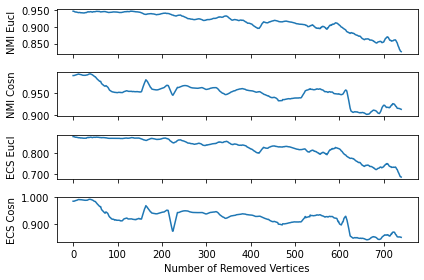

CPU times: user 4h 57min 57s, sys: 5h 39min 19s, total: 10h 37min 16s
Wall time: 6min 7s


In [8]:
%%time
### 1 Hope 方法
from gem.embedding.hope import HOPE  

idx = [True] *(G0.number_of_nodes())
G=G0.copy()

scores=[]

for i in temp:
    G.remove_node(i)
    print(f"Vertex {i} is removed.", end=' ')
    if not nx.is_connected(G):
        print("In total", temp.index(i), "vertices are removed. G is now disconnected!!")
        break
    
    hope_model = HOPE(d=D, beta=0.01) 
    # A higher value of beta places more emphasis on capturing higher-order proximities
    embd = hope_model.learn_embedding(graph=G, is_weighted=False, no_python=True)
    
    idx[i] = False
    intrin_list = intrinsic_membership[idx]
    intrin_Clus = Clustering({i: [intrin_list[i]] for i in range(len(intrin_list))})
    K = len(np.unique(intrinsic_membership[idx]))
    score = EE(K,intrin_list,intrin_Clus, embd)
    scores.append(score)
    print("NMI&ECS:", score)
    
quar_plot(scores=scores, disturb=True, filename="1HOPE", win=10)
save_scores_to_csv(scores, True, "1HOPE")
#Measure.append(scores)

Vertex 291 is removed. NMI&ECS: [1.0000000000000002, 1.0000000000000002, 1.0, 1.0]
Vertex 335 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 701 is removed. NMI&ECS: [1.0, 0.9999999999999998, 1.0, 1.0]
Vertex 760 is removed. NMI&ECS: [0.9999999999999998, 0.9999999999999998, 1.0, 1.0]
Vertex 681 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 356 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 883 is removed. NMI&ECS: [1.0000000000000002, 1.0000000000000002, 1.0, 1.0]
Vertex 325 is removed. NMI&ECS: [0.9999999999999998, 1.0, 1.0, 1.0]
Vertex 491 is removed. NMI&ECS: [1.0, 0.9999999999999998, 1.0, 1.0]
Vertex 780 is removed. NMI&ECS: [1.0, 1.0000000000000002, 1.0, 1.0]
Vertex 346 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 824 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 614 is removed. NMI&ECS: [0.9999999999999998, 0.9999999999999998, 1.0, 1.0]
Vertex 983 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 687 is removed. NMI&ECS: [0.9999999999999998, 0.9999999999999998, 1.0, 

Vertex 378 is removed. NMI&ECS: [0.9999999999999998, 0.9999999999999998, 1.0, 1.0]
Vertex 818 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 593 is removed. NMI&ECS: [1.0000000000000002, 1.0, 1.0, 1.0]
Vertex 836 is removed. NMI&ECS: [0.9999999999999998, 1.0, 1.0, 1.0]
Vertex 230 is removed. NMI&ECS: [1.0000000000000002, 1.0000000000000002, 1.0, 1.0]
Vertex 590 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 316 is removed. NMI&ECS: [0.9999999999999998, 0.9999999999999998, 1.0, 1.0]
Vertex 226 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 645 is removed. NMI&ECS: [0.9999999999999998, 1.0, 1.0, 1.0]
Vertex 18 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 736 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 992 is removed. NMI&ECS: [1.0, 1.0000000000000002, 1.0, 1.0]
Vertex 23 is removed. NMI&ECS: [1.0, 0.9999999999999998, 1.0, 1.0]
Vertex 100 is removed. NMI&ECS: [1.0, 1.0000000000000002, 1.0, 1.0]
Vertex 39 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 586 is removed. NMI&E

Vertex 908 is removed. NMI&ECS: [0.9973153234848892, 1.0, 0.9960891336658931, 1.0]
Vertex 178 is removed. NMI&ECS: [1.0, 0.9999999999999998, 1.0, 1.0]
Vertex 961 is removed. NMI&ECS: [0.9866718686376367, 1.0, 0.9694847511077402, 1.0]
Vertex 633 is removed. NMI&ECS: [0.997310732177358, 1.0, 0.9960742842931777, 1.0]
Vertex 755 is removed. NMI&ECS: [0.997311077760702, 1.0, 0.9960695573622403, 1.0]
Vertex 843 is removed. NMI&ECS: [0.9876448664166437, 1.0, 0.9723199496347433, 1.0]
Vertex 389 is removed. NMI&ECS: [0.9973040352381078, 0.9999999999999998, 0.9960590481573265, 1.0]
Vertex 218 is removed. NMI&ECS: [0.9973002649931916, 1.0, 0.9960537724520485, 1.0]
Vertex 778 is removed. NMI&ECS: [0.9972965371495442, 1.0000000000000002, 0.9960484826027886, 1.0]
Vertex 869 is removed. NMI&ECS: [0.9973168489608092, 1.0000000000000002, 0.9960465681532961, 1.0]
Vertex 598 is removed. NMI&ECS: [0.9809879372507548, 1.0, 0.9503999475478626, 1.0]
Vertex 511 is removed. NMI&ECS: [0.9687882155466171, 1.0000

Vertex 756 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 853 is removed. NMI&ECS: [0.9770776615737146, 1.0, 0.9413186632728467, 1.0]
Vertex 497 is removed. NMI&ECS: [1.0000000000000002, 1.0000000000000002, 1.0, 1.0]
Vertex 223 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 109 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 308 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 334 is removed. NMI&ECS: [0.9999999999999998, 1.0, 1.0, 1.0]
Vertex 68 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 805 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 547 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 388 is removed. NMI&ECS: [1.0, 0.9999999999999998, 1.0, 1.0]
Vertex 483 is removed. NMI&ECS: [1.0000000000000002, 1.0, 1.0, 1.0]
Vertex 467 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 384 is removed. NMI&ECS: [1.0000000000000002, 1.0000000000000002, 1.0, 1.0]
Vertex 895 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 533 is removed. NMI&ECS: [1.0, 1.0000000000000002, 1.0, 1.0]
Ver

Vertex 910 is removed. NMI&ECS: [0.98752072804654, 1.0, 0.971070020545283, 1.0]
Vertex 607 is removed. NMI&ECS: [0.9787821172646067, 1.0, 0.9539485461891931, 1.0]
Vertex 581 is removed. NMI&ECS: [0.9938738432613096, 0.9999999999999998, 0.989026159026159, 1.0]
Vertex 579 is removed. NMI&ECS: [0.9818899920003739, 1.0, 0.9647582883563007, 1.0]
Vertex 106 is removed. NMI&ECS: [0.9796874362323785, 1.0000000000000002, 0.9571897340835424, 1.0]
Vertex 749 is removed. NMI&ECS: [0.9742586134520477, 0.9999999999999998, 0.9517204797242345, 1.0]
Vertex 886 is removed. NMI&ECS: [0.9868798516544548, 1.0, 0.9701919527500922, 1.0]
Vertex 307 is removed. NMI&ECS: [0.9832840442894635, 1.0, 0.9587296363337173, 1.0]
Vertex 997 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 916 is removed. NMI&ECS: [0.9868506136103616, 1.0, 0.9700632051509244, 1.0]
Vertex 967 is removed. NMI&ECS: [0.9808244539696035, 0.9999999999999998, 0.9605541817012981, 1.0]
Vertex 911 is removed. NMI&ECS: [0.9820875925671438, 0.983533

Vertex 498 is removed. NMI&ECS: [0.9749691587600273, 0.9999999999999998, 0.9459789257448896, 1.0]
Vertex 685 is removed. NMI&ECS: [1.0000000000000002, 0.9707865382532458, 1.0, 0.9381016270551154]
Vertex 49 is removed. NMI&ECS: [0.9704152372770145, 1.0, 0.9283385696429175, 1.0]
Vertex 77 is removed. NMI&ECS: [0.9735805243601697, 0.9805334360753483, 0.9487492252882338, 0.9489508887667216]
Vertex 444 is removed. NMI&ECS: [0.9518989228539382, 0.9822921644220906, 0.8857037195052372, 0.954947306791569]
Vertex 490 is removed. NMI&ECS: [0.9727527603421009, 0.9958158573551156, 0.947998818559137, 0.9931759359576261]
Vertex 646 is removed. NMI&ECS: [0.9562330338811881, 0.9999999999999998, 0.8707443846964538, 1.0]
Vertex 277 is removed. NMI&ECS: [0.9775773376452371, 0.9999999999999998, 0.937851443060631, 1.0]
Vertex 166 is removed. NMI&ECS: [0.9472244934024566, 1.0, 0.8760924578547986, 1.0]
Vertex 994 is removed. NMI&ECS: [0.9602005102797542, 1.0, 0.9149647906543494, 1.0]
Vertex 350 is removed. NM

Vertex 834 is removed. NMI&ECS: [0.9736774566028814, 0.9705911732896458, 0.942044377491134, 0.8959787577673757]
Vertex 212 is removed. NMI&ECS: [0.9454264348586459, 0.9558682393861118, 0.8871921061394745, 0.8701824152858636]
Vertex 799 is removed. NMI&ECS: [0.9570035972902471, 0.9612620756467822, 0.9044796447757126, 0.8807944658915355]
Vertex 563 is removed. NMI&ECS: [0.9224632224076214, 0.9701404559371668, 0.8337127170067278, 0.8940370908411278]
Vertex 506 is removed. NMI&ECS: [0.957378437575883, 0.9613589155106922, 0.9004972172955128, 0.8940826849214532]
Vertex 977 is removed. NMI&ECS: [0.8987314963935928, 0.9651124680163907, 0.7842727317407241, 0.8880963629793217]
Vertex 243 is removed. NMI&ECS: [0.9560684097462983, 0.953189596096599, 0.8898745913238665, 0.8634444393964634]
Vertex 954 is removed. NMI&ECS: [0.9253584314673468, 0.955418304860644, 0.8472349258875155, 0.8685876406405677]
Vertex 337 is removed. NMI&ECS: [0.9427868423653206, 0.9614646171780802, 0.8782370090893501, 0.88184

Vertex 787 is removed. NMI&ECS: [0.9102668784742124, 0.9395960082433632, 0.8338204283106292, 0.8494458123798669]
Vertex 517 is removed. NMI&ECS: [0.9469059695562075, 0.9349103651289872, 0.8719512728723813, 0.8485939033498288]
Vertex 496 is removed. NMI&ECS: [0.9446988484002992, 0.9354736029139981, 0.8805059467312126, 0.8848274614484445]
Vertex 221 is removed. NMI&ECS: [0.9654245516046441, 0.9434611329766559, 0.9261022311022311, 0.9042705680792638]
Vertex 151 is removed. NMI&ECS: [0.9389994755666298, 0.8830100981913838, 0.8595514528912116, 0.7745277353028861]
Vertex 441 is removed. NMI&ECS: [0.9460272594057532, 0.9276839419553369, 0.8899769594447466, 0.8415872063029253]
Vertex 158 is removed. NMI&ECS: [0.9461476720060806, 0.9186116622807217, 0.8587091973770176, 0.8629219248631939]
Vertex 72 is removed. NMI&ECS: [0.9168944368609729, 0.9356188232066962, 0.8291524399837835, 0.8918444540190043]
Vertex 387 is removed. NMI&ECS: [0.933900534466686, 0.9215344058369674, 0.856406742053083, 0.8618

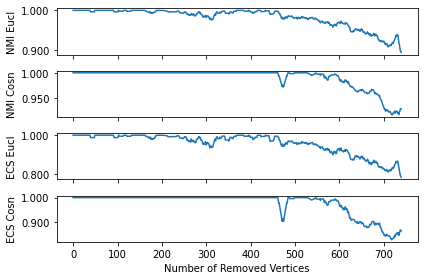

CPU times: user 4h 59min 28s, sys: 6h 28min 38s, total: 11h 28min 6s
Wall time: 7min 11s


In [9]:
%%time
### 2 Laplacian 方法
from gem.embedding.lap import LaplacianEigenmaps

idx = [True] *(G0.number_of_nodes())
G=G0.copy()

scores=[]

for i in temp:
    G.remove_node(i)
    print(f"Vertex {i} is removed.", end=' ')
    if not nx.is_connected(G):
        print("In total", temp.index(i), "vertices are removed. G is now disconnected!!")
        break

    lap_model = LaplacianEigenmaps(d=D)
    embd = lap_model.learn_embedding(graph=G, is_weighted=False, no_python=True)
    
    idx[i] = False
    intrin_list = intrinsic_membership[idx]
    intrin_Clus = Clustering({i: [intrin_list[i]] for i in range(len(intrin_list))})
    K = len(np.unique(intrinsic_membership[idx]))
    score = EE(K,intrin_list,intrin_Clus, embd)
    scores.append(score)
    print("NMI&ECS:", score)
    
quar_plot(scores=scores, disturb=True, filename="2LAP", win=10)
save_scores_to_csv(scores, True, "2LAP")
#Measure.append(scores)

Vertex 291 is removed. NMI&ECS: [1.0, 1.0000000000000002, 1.0, 1.0]
Vertex 335 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 701 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 760 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 681 is removed. NMI&ECS: [1.0, 0.9999999999999998, 1.0, 1.0]
Vertex 356 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 883 is removed. NMI&ECS: [0.9999999999999998, 1.0, 1.0, 1.0]
Vertex 325 is removed. NMI&ECS: [0.9999999999999998, 0.9999999999999998, 1.0, 1.0]
Vertex 491 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 780 is removed. NMI&ECS: [1.0000000000000002, 1.0, 1.0, 1.0]
Vertex 346 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 824 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 614 is removed. NMI&ECS: [1.0, 0.9999999999999998, 1.0, 1.0]
Vertex 983 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 687 is removed. NMI&ECS: [1.0, 0.9999999999999998, 1.0, 1.0]
Vertex 271 is removed. NMI&ECS: [0.9632198462971893, 1.0, 0.8758943661071982, 1.0]
Ve

Vertex 593 is removed. NMI&ECS: [1.0, 1.0000000000000002, 1.0, 1.0]
Vertex 836 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 230 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 590 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 316 is removed. NMI&ECS: [0.9999999999999998, 1.0, 1.0, 1.0]
Vertex 226 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 645 is removed. NMI&ECS: [1.0, 0.9999999999999998, 1.0, 1.0]
Vertex 18 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 736 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 992 is removed. NMI&ECS: [1.0, 0.9999999999999998, 1.0, 1.0]
Vertex 23 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 100 is removed. NMI&ECS: [1.0, 0.9999999999999998, 1.0, 1.0]
Vertex 39 is removed. NMI&ECS: [0.9999999999999998, 1.0, 1.0, 1.0]
Vertex 586 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 143 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 152 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 425 is removed. NMI&ECS: [1.0000000000000002, 0.9999999999

Vertex 328 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 89 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 523 is removed. NMI&ECS: [0.9973429988506899, 1.0, 0.9960172280294232, 1.0]
Vertex 492 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 133 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 188 is removed. NMI&ECS: [1.0, 0.9999999999999998, 1.0, 1.0]
Vertex 272 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 746 is removed. NMI&ECS: [1.0, 0.9999999999999998, 1.0, 1.0]
Vertex 631 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 371 is removed. NMI&ECS: [0.9973175612386783, 1.0000000000000002, 0.9959790893101427, 1.0]
Vertex 431 is removed. NMI&ECS: [0.9820773909293359, 1.0000000000000002, 0.9552801992528018, 1.0]
Vertex 182 is removed. NMI&ECS: [0.9603342748910432, 1.0, 0.8678169664211676, 1.0]
Vertex 448 is removed. NMI&ECS: [1.0000000000000002, 1.0000000000000002, 1.0, 1.0]
Vertex 782 is removed. NMI&ECS: [0.9807726855323873, 0.9999999999999998, 0.948748280605227, 1.0]
Verte

Vertex 622 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 718 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 840 is removed. NMI&ECS: [1.0, 1.0000000000000002, 1.0, 1.0]
Vertex 175 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 915 is removed. NMI&ECS: [1.0, 1.0000000000000002, 1.0, 1.0]
Vertex 22 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 867 is removed. NMI&ECS: [0.9999999999999998, 0.9999999999999998, 1.0, 1.0]
Vertex 537 is removed. NMI&ECS: [1.0000000000000002, 1.0000000000000002, 1.0, 1.0]
Vertex 180 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 566 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 751 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 298 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 660 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 849 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 676 is removed. NMI&ECS: [1.0, 0.9999999999999998, 1.0, 1.0]
Vertex 345 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 9 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.

Vertex 871 is removed. NMI&ECS: [0.9938760902015462, 1.0000000000000002, 0.9886508998958798, 1.0]
Vertex 595 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 242 is removed. NMI&ECS: [0.973885363272351, 1.0, 0.9302308114092713, 1.0]
Vertex 697 is removed. NMI&ECS: [0.9938386159130141, 1.0000000000000002, 0.9885821174710064, 1.0]
Vertex 392 is removed. NMI&ECS: [0.9936386698989519, 0.9999999999999998, 0.9884780326885589, 1.0]
Vertex 294 is removed. NMI&ECS: [0.9936257381865157, 1.0, 0.9884546615581098, 1.0]
Vertex 79 is removed. NMI&ECS: [0.98396848844109, 1.0000000000000002, 0.9609460664837256, 1.0]
Vertex 521 is removed. NMI&ECS: [0.9767455837329847, 1.0000000000000002, 0.949009027904264, 1.0]
Vertex 876 is removed. NMI&ECS: [0.9936041307805645, 0.9999999999999998, 0.988390639702593, 1.0]
Vertex 225 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 200 is removed. NMI&ECS: [0.9734178309722681, 1.0, 0.9434552819798722, 1.0]
Vertex 680 is removed. NMI&ECS: [0.9935325913619345, 1.0, 0.988

Vertex 43 is removed. NMI&ECS: [0.9717848683906338, 1.0, 0.9461761207497642, 1.0]
Vertex 945 is removed. NMI&ECS: [0.9535258007339257, 1.0, 0.9064454478671271, 1.0]
Vertex 668 is removed. NMI&ECS: [0.979451765095582, 1.0, 0.9446667004270691, 1.0]
Vertex 36 is removed. NMI&ECS: [0.9906351508989027, 1.0, 0.9800772921108742, 1.0]
Vertex 97 is removed. NMI&ECS: [0.9881415325309535, 1.0, 0.9738748367177295, 1.0]
Vertex 471 is removed. NMI&ECS: [0.9620068668480171, 1.0, 0.9111160320299855, 1.0]
Vertex 880 is removed. NMI&ECS: [0.9664997744112432, 1.0, 0.9309323036354618, 1.0]
Vertex 888 is removed. NMI&ECS: [0.9678518176973503, 1.0, 0.9444082636324332, 1.0]
Vertex 570 is removed. NMI&ECS: [0.9711540320042416, 1.0, 0.9257703452586126, 1.0]
Vertex 162 is removed. NMI&ECS: [0.9677481963009168, 1.0000000000000002, 0.9265271765271765, 1.0]
Vertex 989 is removed. NMI&ECS: [0.9618645456609977, 1.0, 0.9125468048418638, 1.0]
Vertex 263 is removed. NMI&ECS: [0.990044190487118, 0.9999999999999998, 0.97

Vertex 716 is removed. NMI&ECS: [0.9557997104268993, 0.9866602110050993, 0.8792833726920356, 0.9748113854595336]
Vertex 664 is removed. NMI&ECS: [0.9223058981365422, 0.986582825011423, 0.8200954704050679, 0.9743556752844678]
Vertex 890 is removed. NMI&ECS: [0.92738072666351, 0.9786507685561256, 0.8336475352604384, 0.9595558513260376]
Vertex 658 is removed. NMI&ECS: [0.9622053096356711, 0.9917881360369158, 0.9205001304421222, 0.983177570093458]
Vertex 134 is removed. NMI&ECS: [0.9321487117244256, 0.9812159835124364, 0.8645386299845141, 0.9662562003968255]
Vertex 774 is removed. NMI&ECS: [0.9442551919280318, 0.9838717413606174, 0.8970646907950985, 0.9673632880529432]
Vertex 213 is removed. NMI&ECS: [0.9361768252281999, 0.9621738429431924, 0.8623908840265666, 0.8844495127513995]
Vertex 752 is removed. NMI&ECS: [0.9362870100486718, 0.9586025062895202, 0.8693767160713719, 0.8865827546130638]
Vertex 909 is removed. NMI&ECS: [0.9308344368870133, 0.9517931791276316, 0.8567682978755926, 0.87476

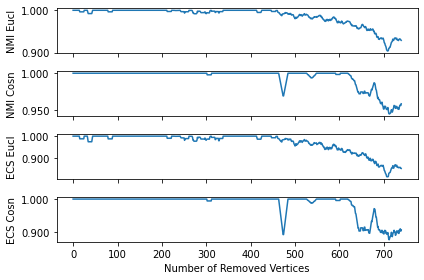

CPU times: user 6h 34min 4s, sys: 9h 33min 21s, total: 16h 7min 26s
Wall time: 10min 16s


In [10]:
%%time
### 3 LLE 方法
from auxpack.lle import lle

idx = [True] *(G0.number_of_nodes())
G=G0.copy()

scores=[]

for i in temp:
    G.remove_node(i)
    print(f"Vertex {i} is removed.", end=' ')
    if not nx.is_connected(G):
        print("In total", temp.index(i), "vertices are removed. G is now disconnected!!")
        break
    
    embd = lle(G, D)
    
    idx[i] = False
    intrin_list = intrinsic_membership[idx]
    intrin_Clus = Clustering({i: [intrin_list[i]] for i in range(len(intrin_list))})
    K = len(np.unique(intrinsic_membership[idx]))
    score = EE(K,intrin_list,intrin_Clus, embd)
    scores.append(score)
    print("NMI&ECS:", score)
    
quar_plot(scores=scores, disturb=True, filename="3LLE", win=10)
save_scores_to_csv(scores, True, "3LLE")
#Measure.append(scores)

Vertex 291 is removed. NMI&ECS: [1.0000000000000002, 1.0000000000000002, 1.0, 1.0]
Vertex 335 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 701 is removed. NMI&ECS: [0.997800027335139, 0.997800027335139, 0.9970259583250455, 0.9970259583250455]
Vertex 760 is removed. NMI&ECS: [0.9999999999999998, 1.0, 1.0, 1.0]
Vertex 681 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 356 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 883 is removed. NMI&ECS: [1.0, 1.0000000000000002, 1.0, 1.0]
Vertex 325 is removed. NMI&ECS: [1.0000000000000002, 0.9999999999999998, 1.0, 1.0]
Vertex 491 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 780 is removed. NMI&ECS: [1.0000000000000002, 1.0000000000000002, 1.0, 1.0]
Vertex 346 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 824 is removed. NMI&ECS: [0.9977854289024258, 1.0, 0.9969992838288795, 1.0]
Vertex 614 is removed. NMI&ECS: [0.9999999999999998, 0.9999999999999998, 1.0, 1.0]
Vertex 983 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 687 is remove

Vertex 318 is removed. NMI&ECS: [1.0000000000000002, 1.0000000000000002, 1.0, 1.0]
Vertex 912 is removed. NMI&ECS: [0.9999999999999998, 1.0000000000000002, 1.0, 1.0]
Vertex 378 is removed. NMI&ECS: [0.9999999999999998, 1.0, 1.0, 1.0]
Vertex 818 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 593 is removed. NMI&ECS: [1.0, 1.0000000000000002, 1.0, 1.0]
Vertex 836 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 230 is removed. NMI&ECS: [1.0, 1.0000000000000002, 1.0, 1.0]
Vertex 590 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 316 is removed. NMI&ECS: [1.0, 0.9999999999999998, 1.0, 1.0]
Vertex 226 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 645 is removed. NMI&ECS: [1.0, 0.9999999999999998, 1.0, 1.0]
Vertex 18 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 736 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 992 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 23 is removed. NMI&ECS: [1.0, 0.9999999999999998, 1.0, 1.0]
Vertex 100 is removed. NMI&ECS: [0.9999999999999998, 0.99

Vertex 908 is removed. NMI&ECS: [1.0000000000000002, 1.0000000000000002, 1.0, 1.0]
Vertex 178 is removed. NMI&ECS: [1.0, 0.9999999999999998, 1.0, 1.0]
Vertex 961 is removed. NMI&ECS: [0.9973255954778991, 1.0, 0.9960810660538216, 1.0]
Vertex 633 is removed. NMI&ECS: [0.9973340609806034, 0.9973340609806034, 0.9960775512518923, 0.9960775512518923]
Vertex 755 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 843 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 389 is removed. NMI&ECS: [0.9999999999999998, 0.9999999999999998, 1.0, 1.0]
Vertex 218 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 778 is removed. NMI&ECS: [1.0000000000000002, 1.0000000000000002, 1.0, 1.0]
Vertex 869 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 598 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 511 is removed. NMI&ECS: [0.9972742150045121, 1.0, 0.9960310321811158, 1.0]
Vertex 656 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 83 is removed. NMI&ECS: [0.9999999999999998, 1.0, 1.0, 1.0]
Vertex 328 is remov

Vertex 68 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 805 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 547 is removed. NMI&ECS: [0.9969210606933082, 0.9969210606933082, 0.995358088197823, 0.995358088197823]
Vertex 388 is removed. NMI&ECS: [1.0, 1.0000000000000002, 1.0, 1.0]
Vertex 483 is removed. NMI&ECS: [0.9999999999999998, 1.0, 1.0, 1.0]
Vertex 467 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 384 is removed. NMI&ECS: [0.9967792179700801, 0.9967792179700801, 0.9953162100220925, 0.9953162100220925]
Vertex 895 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 533 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 443 is removed. NMI&ECS: [1.0000000000000002, 1.0000000000000002, 1.0, 1.0]
Vertex 351 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 247 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 375 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 919 is removed. NMI&ECS: [0.9999999999999998, 1.0, 1.0, 1.0]
Vertex 700 is removed. NMI&ECS: [1.0000000000000002, 1.0, 1.0, 1.0

Vertex 307 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 997 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 916 is removed. NMI&ECS: [1.0, 1.0000000000000002, 1.0, 1.0]
Vertex 967 is removed. NMI&ECS: [1.0000000000000002, 1.0000000000000002, 1.0, 1.0]
Vertex 911 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 6 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 355 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 524 is removed. NMI&ECS: [1.0, 0.9999999999999998, 1.0, 1.0]
Vertex 721 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 525 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 349 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 585 is removed. NMI&ECS: [1.0000000000000002, 1.0, 1.0, 1.0]
Vertex 744 is removed. NMI&ECS: [1.0000000000000002, 0.9964067681659686, 1.0, 0.9942113699568967]
Vertex 955 is removed. NMI&ECS: [0.9999999999999998, 1.0, 1.0, 1.0]
Vertex 815 is removed. NMI&ECS: [0.996147410222393, 0.9999999999999998, 0.9941450432468396, 1.0]
Vertex 360 is removed. NMI&E

Vertex 880 is removed. NMI&ECS: [0.9955571256818566, 1.0, 0.992719894975534, 1.0]
Vertex 888 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 570 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 162 is removed. NMI&ECS: [0.9953443820380756, 0.9953443820380756, 0.9926326566951568, 0.9926326566951568]
Vertex 989 is removed. NMI&ECS: [0.9956324547861293, 0.9956324547861295, 0.9926783659378595, 0.9926783659378595]
Vertex 263 is removed. NMI&ECS: [1.0, 0.9999999999999998, 1.0, 1.0]
Vertex 440 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 433 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 659 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 649 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 583 is removed. NMI&ECS: [1.0000000000000002, 0.9999999999999998, 1.0, 1.0]
Vertex 949 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 237 is removed. NMI&ECS: [1.0000000000000002, 1.0000000000000002, 1.0, 1.0]
Vertex 864 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 276 is removed. NMI&ECS: [0

Vertex 975 is removed. NMI&ECS: [0.9784607150381875, 0.9836255748916752, 0.9660267840478982, 0.9724026229740727]
Vertex 420 is removed. NMI&ECS: [0.9834000587618154, 0.9779701154047568, 0.9710481543546062, 0.9626466792864642]
Vertex 926 is removed. NMI&ECS: [0.9777547026638207, 0.9723013471966199, 0.961864140926641, 0.953026061776062]
Vertex 78 is removed. NMI&ECS: [0.977730261533531, 0.9751113525892378, 0.9617553698351949, 0.9550673693206095]
Vertex 233 is removed. NMI&ECS: [0.9778263645346482, 0.9889380960143339, 0.9679300291545189, 0.9809410430839002]
Vertex 962 is removed. NMI&ECS: [0.9891492264474088, 0.9784432544804645, 0.9837627986348121, 0.9688188688444661]
Vertex 98 is removed. NMI&ECS: [0.9775434537480227, 0.9775434537480227, 0.964613140537798, 0.964613140537798]
Vertex 457 is removed. NMI&ECS: [0.9716116752223279, 0.9716116752223279, 0.9526026616906229, 0.9526026616906229]
Vertex 857 is removed. NMI&ECS: [0.9778734614887685, 0.9834572073331117, 0.9675030641178084, 0.97413436

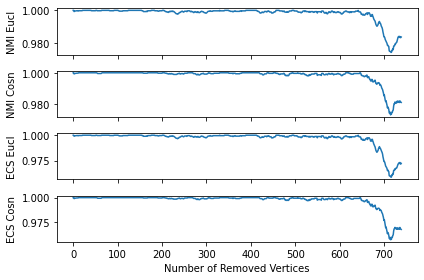

CPU times: user 4h 12min 40s, sys: 4h 13min 20s, total: 8h 26min 1s
Wall time: 9min 16s


In [11]:
%%time
### 4 DeepWalk方法
from auxpack.DeepWalk import DeepWalk

idx = [True] *(G0.number_of_nodes())
G=G0.copy()

scores=[]

for i in temp:
    G.remove_node(i)
    print(f"Vertex {i} is removed.", end=' ')
    if not nx.is_connected(G):
        print("In total", temp.index(i), "vertices are removed. G is now disconnected!!")
        break
 
    model = DeepWalk(dimensions=D, walk_length=16, window_size=10, walk_number=10, workers=wk)
    model.fit(G)
    embd = model.get_embedding()
    
    idx[i] = False
    intrin_list = intrinsic_membership[idx]
    intrin_Clus = Clustering({i: [intrin_list[i]] for i in range(len(intrin_list))})
    K = len(np.unique(intrinsic_membership[idx]))
    score = EE(K,intrin_list,intrin_Clus, embd)
    scores.append(score)
    print("NMI&ECS:", score)
    
quar_plot(scores=scores, disturb=True, filename="4DeepWalk", win=10)
save_scores_to_csv(scores, True, "4DeepWalk")
#Measure.append(scores)

Vertex 291 is removed. NMI&ECS: [1.0000000000000002, 1.0000000000000002, 1.0, 1.0]
Vertex 335 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 701 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 760 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 681 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 356 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 883 is removed. NMI&ECS: [1.0, 1.0000000000000002, 1.0, 1.0]
Vertex 325 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 491 is removed. NMI&ECS: [1.0, 0.9999999999999998, 1.0, 1.0]
Vertex 780 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 346 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 824 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 614 is removed. NMI&ECS: [0.9999999999999998, 0.9999999999999998, 1.0, 1.0]
Vertex 983 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 687 is removed. NMI&ECS: [0.9999999999999998, 1.0, 1.0, 1.0]
Vertex 271 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 984 is removed. NMI&ECS: [1.0, 1.0, 1.0,

Vertex 590 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 316 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 226 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 645 is removed. NMI&ECS: [0.9999999999999998, 0.9999999999999998, 1.0, 1.0]
Vertex 18 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 736 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 992 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 23 is removed. NMI&ECS: [0.9999999999999998, 1.0, 1.0, 1.0]
Vertex 100 is removed. NMI&ECS: [0.9999999999999998, 0.9999999999999998, 1.0, 1.0]
Vertex 39 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 586 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 143 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 152 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 425 is removed. NMI&ECS: [1.0, 1.0000000000000002, 1.0, 1.0]
Vertex 804 is removed. NMI&ECS: [1.0, 0.9999999999999998, 1.0, 1.0]
Vertex 173 is removed. NMI&ECS: [1.0000000000000002, 1.0000000000000002, 1.0, 1.0]
Vertex 777 is remove

Vertex 188 is removed. NMI&ECS: [0.9999999999999998, 0.9973276275329792, 1.0, 0.9960001193459841]
Vertex 272 is removed. NMI&ECS: [1.0, 1.0000000000000002, 1.0, 1.0]
Vertex 746 is removed. NMI&ECS: [0.9999999999999998, 1.0, 1.0, 1.0]
Vertex 631 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 371 is removed. NMI&ECS: [1.0000000000000002, 1.0000000000000002, 1.0, 1.0]
Vertex 431 is removed. NMI&ECS: [1.0000000000000002, 1.0, 1.0, 1.0]
Vertex 182 is removed. NMI&ECS: [1.0000000000000002, 1.0000000000000002, 1.0, 1.0]
Vertex 448 is removed. NMI&ECS: [1.0000000000000002, 0.9973120913387783, 1.0, 0.9959634115884116]
Vertex 782 is removed. NMI&ECS: [0.9999999999999998, 1.0, 1.0, 1.0]
Vertex 501 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 936 is removed. NMI&ECS: [1.0, 0.9973013064831177, 1.0, 0.99594670846395]
Vertex 689 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 965 is removed. NMI&ECS: [1.0, 0.9999999999999998, 1.0, 1.0]
Vertex 297 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Verte

Vertex 180 is removed. NMI&ECS: [1.0, 1.0000000000000002, 1.0, 1.0]
Vertex 566 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 751 is removed. NMI&ECS: [0.9999999999999998, 0.9999999999999998, 1.0, 1.0]
Vertex 298 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 660 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 849 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 676 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 345 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 9 is removed. NMI&ECS: [1.0, 0.9967249763253182, 1.0, 0.9950839147081524]
Vertex 948 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 592 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 238 is removed. NMI&ECS: [1.0000000000000002, 1.0000000000000002, 1.0, 1.0]
Vertex 768 is removed. NMI&ECS: [1.0, 0.9967125531529311, 1.0, 0.9950523102038253]
Vertex 207 is removed. NMI&ECS: [1.0000000000000002, 1.0000000000000002, 1.0, 1.0]
Vertex 719 is removed. NMI&ECS: [0.9967014789271219, 0.9967014789271219, 0.995035595035595, 0.9

Vertex 225 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 200 is removed. NMI&ECS: [0.9962685091197572, 0.988381611245007, 0.9940259345997051, 0.9822831335103306]
Vertex 680 is removed. NMI&ECS: [0.996187597460875, 0.9961875974608749, 0.9939980226633205, 0.9939980226633205]
Vertex 90 is removed. NMI&ECS: [1.0, 0.9961888071327981, 1.0, 0.9939873525999334]
Vertex 450 is removed. NMI&ECS: [1.0, 0.996190003088078, 1.0, 0.9939767086674303]
Vertex 652 is removed. NMI&ECS: [1.0, 0.9960323956735695, 1.0, 0.993944760473686]
Vertex 31 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 157 is removed. NMI&ECS: [1.0, 0.9999999999999998, 1.0, 1.0]
Vertex 365 is removed. NMI&ECS: [1.0, 0.9961588710068081, 1.0, 0.9939266189266189]
Vertex 602 is removed. NMI&ECS: [0.996208407587017, 0.9923741454339827, 0.9939263668430336, 0.9879946538800705]
Vertex 512 is removed. NMI&ECS: [0.9999999999999998, 0.9934630864284385, 1.0, 0.9881240364389782]
Vertex 125 is removed. NMI&ECS: [0.9999999999999998, 0.999999999

Vertex 765 is removed. NMI&ECS: [0.9954325264410924, 0.9954406647122219, 0.992446636977887, 0.9924485693400168]
Vertex 717 is removed. NMI&ECS: [0.990445770132991, 0.9904457701329912, 0.9849108960336115, 0.9849108960336115]
Vertex 704 is removed. NMI&ECS: [1.0, 0.9954158684146699, 1.0, 0.9924090330538387]
Vertex 924 is removed. NMI&ECS: [0.995274593598768, 0.995274593598768, 0.9923615317316105, 0.9923615317316105]
Vertex 428 is removed. NMI&ECS: [1.0, 0.9907288419258506, 1.0, 0.9847272643852193]
Vertex 301 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 688 is removed. NMI&ECS: [0.9953322736689391, 0.9595641339490766, 0.9923215140606445, 0.9300555362427844]
Vertex 821 is removed. NMI&ECS: [1.0, 0.9999999999999998, 1.0, 1.0]
Vertex 772 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 81 is removed. NMI&ECS: [1.0, 0.9908518025061717, 1.0, 0.9848292929292929]
Vertex 261 is removed. NMI&ECS: [1.0, 0.9953034600865807, 1.0, 0.9922446753997556]
Vertex 594 is removed. NMI&ECS: [1.0, 0.9860584

Vertex 420 is removed. NMI&ECS: [0.978415457066767, 0.978415457066767, 0.9659206892271408, 0.9659206892271408]
Vertex 926 is removed. NMI&ECS: [0.9783449327194607, 0.9783449327194607, 0.9658055564204757, 0.9658055564204757]
Vertex 78 is removed. NMI&ECS: [0.9782996261296566, 0.9727302384628443, 0.9656969330104923, 0.956318401937046]
Vertex 233 is removed. NMI&ECS: [0.9782224253987809, 0.9782224253987809, 0.9655802559118886, 0.9655802559118886]
Vertex 962 is removed. NMI&ECS: [0.9627561505139507, 0.9627561505139507, 0.9378954056613819, 0.9378954056613819]
Vertex 98 is removed. NMI&ECS: [0.974106963918937, 0.9686270412713492, 0.9554596014126009, 0.9465004526846167]
Vertex 457 is removed. NMI&ECS: [0.9833105871642329, 0.9775766734301846, 0.9717625226414774, 0.9618844820781731]
Vertex 857 is removed. NMI&ECS: [0.9834572073331117, 0.9834572073331117, 0.9741343638525564, 0.9741343638525564]
Vertex 124 is removed. NMI&ECS: [0.9834285748273096, 0.9834285748273096, 0.9740563974068328, 0.9740563

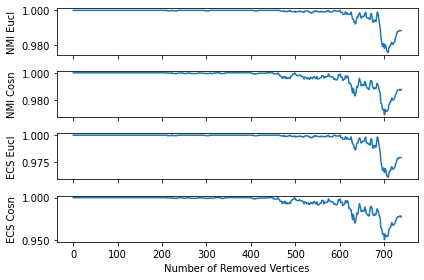

CPU times: user 6h 46min 30s, sys: 14h 52min 34s, total: 21h 39min 4s
Wall time: 20min 30s


In [13]:
%%time
### 5 MNMF 方法
from karateclub import MNMF

idx = [True] *(G0.number_of_nodes())
G=G0.copy()

scores=[]

for i in temp:
    G.remove_node(i)
    print(f"Vertex {i} is removed.", end=' ')
    if not nx.is_connected(G):
        print("In total", temp.index(i), "vertices are removed. G is now disconnected!!")
        break

    # Create an instance of the MNMF model
    MNMF_model = MNMF(dimensions = D, clusters = K, lambd = 0.2, 
                 alpha = 0.05, beta = 0.05, iterations = 100, 
                 lower_control = 1e-15, eta = 5.0, seed = 42)

    # Fit the model to the graph
    H = nx.relabel.convert_node_labels_to_integers(G)
    MNMF_model.fit(H)
    # Obtain the graph embeddings
    embd = MNMF_model.get_embedding()
    
    idx[i] = False
    intrin_list = intrinsic_membership[idx]
    intrin_Clus = Clustering({i: [intrin_list[i]] for i in range(len(intrin_list))})
    K = len(np.unique(intrinsic_membership[idx]))
    score = EE(K,intrin_list,intrin_Clus, embd)
    scores.append(score)
    print("NMI&ECS:", score)
    
quar_plot(scores=scores, disturb=True, filename="5MNMF", win=10)
save_scores_to_csv(scores, True, "5MNMF")
#Measure.append(scores)

Vertex 291 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 335 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 701 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 760 is removed. NMI&ECS: [1.0000000000000002, 0.9999999999999998, 1.0, 1.0]
Vertex 681 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 356 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 883 is removed. NMI&ECS: [1.0000000000000002, 1.0, 1.0, 1.0]
Vertex 325 is removed. NMI&ECS: [0.9999999999999998, 0.9999999999999998, 1.0, 1.0]
Vertex 491 is removed. NMI&ECS: [0.9999999999999998, 0.9999999999999998, 1.0, 1.0]
Vertex 780 is removed. NMI&ECS: [0.9999999999999998, 1.0, 1.0, 1.0]
Vertex 346 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 824 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 614 is removed. NMI&ECS: [0.9999999999999998, 0.9999999999999998, 1.0, 1.0]
Vertex 983 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 687 is removed. NMI&ECS: [0.9999999999999998, 0.9999999999999998, 1.0, 1.0]
Vertex 271 is removed. NM

Vertex 663 is removed. NMI&ECS: [0.9999999999999998, 1.0, 1.0, 1.0]
Vertex 884 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 705 is removed. NMI&ECS: [1.0, 0.9999999999999998, 1.0, 1.0]
Vertex 792 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 986 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 318 is removed. NMI&ECS: [1.0, 1.0000000000000002, 1.0, 1.0]
Vertex 912 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 378 is removed. NMI&ECS: [0.9999999999999998, 0.9999999999999998, 1.0, 1.0]
Vertex 818 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 593 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 836 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 230 is removed. NMI&ECS: [1.0000000000000002, 1.0, 1.0, 1.0]
Vertex 590 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 316 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 226 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 645 is removed. NMI&ECS: [1.0, 0.9999999999999998, 1.0, 1.0]
Vertex 18 is removed. NMI&ECS: [1.0, 1.0, 1.0, 

Vertex 629 is removed. NMI&ECS: [1.0, 1.0000000000000002, 1.0, 1.0]
Vertex 882 is removed. NMI&ECS: [0.9999999999999998, 0.9999999999999998, 1.0, 1.0]
Vertex 568 is removed. NMI&ECS: [0.9999999999999998, 0.9973810320305116, 1.0, 0.9961036983873248]
Vertex 908 is removed. NMI&ECS: [1.0, 0.9973385555998918, 1.0, 0.9960923876260983]
Vertex 178 is removed. NMI&ECS: [0.9973742634538059, 0.9973742634538056, 0.9960933496446617, 0.9960933496446617]
Vertex 961 is removed. NMI&ECS: [1.0, 0.9973374961850291, 1.0, 0.9960827672741638]
Vertex 633 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 755 is removed. NMI&ECS: [0.9974050958761121, 0.9974050958761121, 0.9960848079069027, 0.9960848079069027]
Vertex 843 is removed. NMI&ECS: [0.9999999999999998, 0.9973713298710669, 1.0, 0.9960740693767698]
Vertex 389 is removed. NMI&ECS: [0.9999999999999998, 0.9973277971987238, 1.0, 0.9960624241633764]
Vertex 218 is removed. NMI&ECS: [1.0, 0.9972964941548979, 1.0, 0.9960532630577998]
Vertex 778 is removed. NMI&

Vertex 642 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 489 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 208 is removed. NMI&ECS: [1.0, 1.0000000000000002, 1.0, 1.0]
Vertex 364 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 84 is removed. NMI&ECS: [0.9999999999999998, 0.9999999999999998, 1.0, 1.0]
Vertex 446 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 974 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 414 is removed. NMI&ECS: [0.9999999999999998, 1.0, 1.0, 1.0]
Vertex 495 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 120 is removed. NMI&ECS: [0.9999999999999998, 0.9999999999999998, 1.0, 1.0]
Vertex 993 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 601 is removed. NMI&ECS: [0.997121684011897, 0.997121684011897, 0.9956147125759366, 0.9956147125759366]
Vertex 205 is removed. NMI&ECS: [1.0, 0.9970323850053356, 1.0, 0.9955939570135093]
Vertex 797 is removed. NMI&ECS: [1.0000000000000002, 1.0000000000000002, 1.0, 1.0]
Vertex 638 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0

Vertex 800 is removed. NMI&ECS: [0.9964585943610058, 1.0, 0.9947210403057757, 1.0]
Vertex 679 is removed. NMI&ECS: [0.996689613556836, 0.9932285348117759, 0.9947522627059643, 0.9912308569106633]
Vertex 455 is removed. NMI&ECS: [0.9879700024718623, 0.9879700024718624, 0.9861961961961964, 0.9861961961961964]
Vertex 385 is removed. NMI&ECS: [0.9965142838329802, 0.9965142838329802, 0.9947062956402151, 0.9947062956402151]
Vertex 169 is removed. NMI&ECS: [0.9896679000860407, 0.9931306501931938, 0.9858533196214702, 0.9894076003472919]
Vertex 481 is removed. NMI&ECS: [0.9964344241063504, 0.9964351132845022, 0.994672976011994, 0.9946742267394443]
Vertex 470 is removed. NMI&ECS: [1.0, 0.9999999999999998, 1.0, 1.0]
Vertex 468 is removed. NMI&ECS: [0.9930286188475905, 0.9963776533481414, 0.9893439229619891, 0.9946484101414764]
Vertex 951 is removed. NMI&ECS: [0.9999999999999998, 0.9999999999999998, 1.0, 1.0]
Vertex 447 is removed. NMI&ECS: [1.0, 0.9965147374324915, 1.0, 0.9946495845807125]
Vertex 

Vertex 125 is removed. NMI&ECS: [0.9326767330243243, 0.9371294425747378, 0.9164951437353416, 0.9130381263486189]
Vertex 5 is removed. NMI&ECS: [0.889942135185656, 0.9221252862087742, 0.8581993589881406, 0.8877526483338881]
Vertex 167 is removed. NMI&ECS: [0.9473589929065516, 0.9476829619273506, 0.9188887371325147, 0.9095870295897962]
Vertex 73 is removed. NMI&ECS: [0.9450781750143655, 0.9522394730326247, 0.922660145945216, 0.9338955662271159]
Vertex 211 is removed. NMI&ECS: [0.9618008842975314, 0.9724859411070981, 0.9460981623053086, 0.965263899190797]
Vertex 692 is removed. NMI&ECS: [0.9452898266915701, 0.952052870936741, 0.9305610722836116, 0.9303038232407639]
Vertex 315 is removed. NMI&ECS: [0.9538230182951579, 0.959589576170629, 0.9376771360333689, 0.9477138263109155]
Vertex 542 is removed. NMI&ECS: [0.929828361150098, 0.9453872772393503, 0.9033937616947101, 0.9237513487789903]
Vertex 686 is removed. NMI&ECS: [0.9330177594915169, 0.9421026270798217, 0.9076032475342022, 0.9199758291

Vertex 43 is removed. NMI&ECS: [0.9385168377444099, 0.9642862709632172, 0.9096869181263713, 0.950316818715717]
Vertex 945 is removed. NMI&ECS: [0.9305079923791865, 0.9363255182158904, 0.9077085723320741, 0.9246123420590054]
Vertex 668 is removed. NMI&ECS: [0.9732434184262354, 0.9646990320731658, 0.9593966996343904, 0.9546200986996652]
Vertex 36 is removed. NMI&ECS: [0.9773368807583875, 0.9681781274859284, 0.9689542621637326, 0.9572068513610004]
Vertex 97 is removed. NMI&ECS: [0.9777012936788757, 0.973464530353927, 0.9711389231033858, 0.9616921760270286]
Vertex 471 is removed. NMI&ECS: [0.9579615184158907, 0.9593256149652686, 0.9389780936943825, 0.9448359594548242]
Vertex 880 is removed. NMI&ECS: [0.9312804374861391, 0.9361084690539447, 0.8998089733388326, 0.9108953989830654]
Vertex 888 is removed. NMI&ECS: [0.9249054953013112, 0.9193897380795325, 0.8888578892055347, 0.8838242744054013]
Vertex 570 is removed. NMI&ECS: [0.947816432013338, 0.9505985467955059, 0.9164779881652778, 0.9335377

Vertex 540 is removed. NMI&ECS: [0.6496077138348512, 0.6136753352084016, 0.5005315859923359, 0.49611435113410446]
Vertex 149 is removed. NMI&ECS: [0.6373393463964039, 0.657052870373574, 0.513516715271253, 0.5802862544528422]
Vertex 650 is removed. NMI&ECS: [0.6566215255799859, 0.6769550752573746, 0.5520939485678085, 0.5678697184002495]
Vertex 526 is removed. NMI&ECS: [0.7215757300897089, 0.6813519765431093, 0.6447766595459193, 0.5671943324024462]
Vertex 142 is removed. NMI&ECS: [0.6077313897980986, 0.6279066425516867, 0.4872462016586765, 0.5336123975951704]
Vertex 860 is removed. NMI&ECS: [0.6083981314719294, 0.6314922498054057, 0.4926199018334393, 0.5446982581944605]
Vertex 452 is removed. NMI&ECS: [0.6575502140805617, 0.6787892118707949, 0.5626432344966742, 0.5937897668999285]
Vertex 94 is removed. NMI&ECS: [0.6195290876441318, 0.6539498350785631, 0.49238883095243935, 0.5509612925582491]
Vertex 716 is removed. NMI&ECS: [0.6661128353941828, 0.68980230028213, 0.5445878157413121, 0.6052

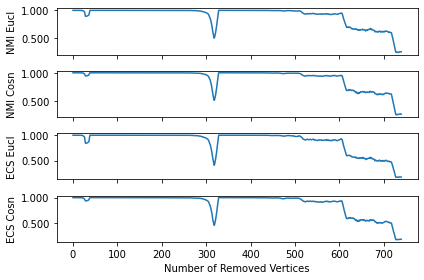

CPU times: user 4h 32min 39s, sys: 4h 12min 13s, total: 8h 44min 52s
Wall time: 35min 51s


In [20]:
%%time
### 6 LINE 方法
from ge import LINE

idx = [True] *(G0.number_of_nodes())
G=G0.copy()

scores=[]

for i in temp:
    G.remove_node(i)
    print(f"Vertex {i} is removed.", end=' ')
    if not nx.is_connected(G):
        print("In total", temp.index(i), "vertices are removed. G is now disconnected!!")
        break
        
    model = LINE(G,embedding_size=D,order='first');
    model.train(batch_size=8192,epochs=50,verbose=0);# train model
    LINE_embd = model.get_embeddings();# get embedding vectors
    embd = list(LINE_embd.values())
    
    idx[i] = False
    intrin_list = intrinsic_membership[idx]
    intrin_Clus = Clustering({i: [intrin_list[i]] for i in range(len(intrin_list))})
    K = len(np.unique(intrinsic_membership[idx]))
    score = EE(K,intrin_list,intrin_Clus, embd)
    scores.append(score)
    print("NMI&ECS:", score)
    
quar_plot(scores=scores, disturb=True, filename="6LINE", win=10)
save_scores_to_csv(scores, True, "6LINE")
#Measure.append(scores)

Vertex 291 is removed. NMI&ECS: [1.0000000000000002, 1.0000000000000002, 1.0, 1.0]
Vertex 335 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 701 is removed. NMI&ECS: [0.9999999999999998, 1.0, 1.0, 1.0]
Vertex 760 is removed. NMI&ECS: [0.9999999999999998, 1.0, 1.0, 1.0]
Vertex 681 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 356 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 883 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 325 is removed. NMI&ECS: [1.0, 0.9999999999999998, 1.0, 1.0]
Vertex 491 is removed. NMI&ECS: [0.9999999999999998, 1.0, 1.0, 1.0]
Vertex 780 is removed. NMI&ECS: [0.9999999999999998, 1.0000000000000002, 1.0, 1.0]
Vertex 346 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 824 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 614 is removed. NMI&ECS: [0.9999999999999998, 0.9999999999999998, 1.0, 1.0]
Vertex 983 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 687 is removed. NMI&ECS: [1.0, 0.9999999999999998, 1.0, 1.0]
Vertex 271 is removed. NMI&ECS: [1.0, 1.

Vertex 230 is removed. NMI&ECS: [1.0000000000000002, 1.0000000000000002, 1.0, 1.0]
Vertex 590 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 316 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 226 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 645 is removed. NMI&ECS: [1.0000000000000002, 1.0, 1.0, 1.0]
Vertex 18 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 736 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 992 is removed. NMI&ECS: [0.9999999999999998, 1.0, 1.0, 1.0]
Vertex 23 is removed. NMI&ECS: [1.0, 0.9999999999999998, 1.0, 1.0]
Vertex 100 is removed. NMI&ECS: [0.9999999999999998, 1.0, 1.0, 1.0]
Vertex 39 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 586 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 143 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 152 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 425 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 804 is removed. NMI&ECS: [0.9999999999999998, 1.0, 1.0, 1.0]
Vertex 173 is removed. NMI&ECS: [1.000000000000000

Vertex 511 is removed. NMI&ECS: [1.0000000000000002, 1.0, 1.0, 1.0]
Vertex 656 is removed. NMI&ECS: [1.0, 1.0000000000000002, 1.0, 1.0]
Vertex 83 is removed. NMI&ECS: [1.0000000000000002, 1.0000000000000002, 1.0, 1.0]
Vertex 328 is removed. NMI&ECS: [0.99734540753802, 0.9999999999999998, 0.9960271455666192, 1.0]
Vertex 89 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 523 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 492 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 133 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 188 is removed. NMI&ECS: [1.0, 0.9999999999999998, 1.0, 1.0]
Vertex 272 is removed. NMI&ECS: [1.0000000000000002, 1.0, 1.0, 1.0]
Vertex 746 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 631 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 371 is removed. NMI&ECS: [1.0000000000000002, 1.0000000000000002, 1.0, 1.0]
Vertex 431 is removed. NMI&ECS: [1.0000000000000002, 1.0000000000000002, 1.0, 1.0]
Vertex 182 is removed. NMI&ECS: [1.0000000000000002, 1.0, 1.0, 1.0]

Vertex 915 is removed. NMI&ECS: [1.0, 0.9999999999999998, 1.0, 1.0]
Vertex 22 is removed. NMI&ECS: [0.9999999999999998, 1.0, 1.0, 1.0]
Vertex 867 is removed. NMI&ECS: [0.9999999999999998, 1.0, 1.0, 1.0]
Vertex 537 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 180 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 566 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 751 is removed. NMI&ECS: [0.9999999999999998, 1.0, 1.0, 1.0]
Vertex 298 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 660 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 849 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 676 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 345 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 9 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 948 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 592 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 238 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 768 is removed. NMI&ECS: [1.0000000000000002, 1.0, 1.0, 1.0]
Vertex 207 is removed. NMI&

Vertex 125 is removed. NMI&ECS: [1.0, 1.0000000000000002, 1.0, 1.0]
Vertex 5 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 167 is removed. NMI&ECS: [1.0, 1.0000000000000002, 1.0, 1.0]
Vertex 73 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 211 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 692 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 315 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 542 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 686 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 820 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 737 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 449 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 623 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 303 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 105 is removed. NMI&ECS: [0.9999999999999998, 0.9999999999999998, 1.0, 1.0]
Vertex 661 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 163 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 546 is removed. NMI&ECS: [1.0, 1.0,

Vertex 563 is removed. NMI&ECS: [0.9899054437112454, 1.0000000000000002, 0.9833336628164214, 1.0]
Vertex 506 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 977 is removed. NMI&ECS: [0.9949953185560119, 0.9949953185560119, 0.991636013312314, 0.991636013312314]
Vertex 243 is removed. NMI&ECS: [0.9999999999999998, 0.9999999999999998, 1.0, 1.0]
Vertex 954 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 337 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 794 is removed. NMI&ECS: [0.9999999999999998, 1.0000000000000002, 1.0, 1.0]
Vertex 87 is removed. NMI&ECS: [0.9999999999999998, 0.9950918723728022, 1.0, 0.9915589357659493]
Vertex 411 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 538 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 759 is removed. NMI&ECS: [0.9949990335914001, 0.9999999999999998, 0.9914778953240492, 1.0]
Vertex 12 is removed. NMI&ECS: [1.0, 0.9949721910580952, 1.0, 0.9914395595814461]
Vertex 372 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 941 is removed. NMI&ECS

Vertex 480 is removed. NMI&ECS: [0.9756744911397385, 0.9696053922101974, 0.9580349292520346, 0.947506568723674]
Vertex 484 is removed. NMI&ECS: [0.9883567870132794, 0.9883567870132794, 0.9791150052350251, 0.9791150052350251]
Vertex 814 is removed. NMI&ECS: [0.9824565144396465, 0.9824565144396465, 0.971707047239739, 0.971707047239739]
Vertex 854 is removed. NMI&ECS: [0.988268855363936, 0.988268855363936, 0.9789549669609641, 0.9789549669609641]
Vertex 957 is removed. NMI&ECS: [0.9882261131306822, 0.9882261131306822, 0.9788740245261985, 0.9788740245261985]
Vertex 569 is removed. In total 740 vertices are removed. G is now disconnected!!


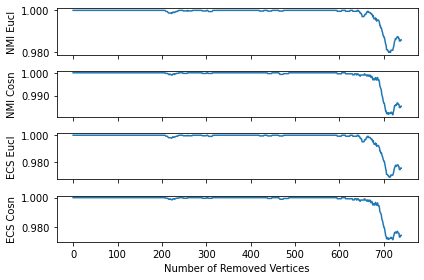

CPU times: user 5h 47min 29s, sys: 4h 14min 18s, total: 10h 1min 48s
Wall time: 1h 35min 7s


In [12]:
%%time
### 7 Node2Vec 方法 以后使用这个
from node2vec import Node2Vec

nodes_range = np.array(range(G0.number_of_nodes()))
idx = [True] *(G0.number_of_nodes())
G=G0.copy()

scores=[]

for i in temp:
    G.remove_node(i)
    print(f"Vertex {i} is removed.", end=' ')
    if not nx.is_connected(G):
        print("In total", temp.index(i), "vertices are removed. G is now disconnected!!")
        break
        
    # Precompute probabilities and generate walks - **ON WINDOWS ONLY WORKS WITH workers=1**
    node2vec_model = Node2Vec(G, dimensions=D, walk_length=16, num_walks=10, workers=wk, quiet=True) #, temp_folder='test' # Use temp_folder for big graphs
    # Embed nodes 
    node2vec_fit = node2vec_model.fit(window=10, min_count=1, batch_words=20000)  
    # Any keywords acceptable by gensim.Word2Vec can be passed, `dimensions` and `workers` are automatically passed 
    # (from the Node2Vec constructor)

    idx[i] = False

    nodes = [str(x) for x in nodes_range[idx]]
    embd = np.array([node2vec_fit.wv[node] for node in nodes])
    
    intrin_list = intrinsic_membership[idx]
    intrin_Clus = Clustering({i: [intrin_list[i]] for i in range(len(intrin_list))})
    K = len(np.unique(intrinsic_membership[idx]))
    score = EE(K,intrin_list,intrin_Clus, embd)
    scores.append(score)
    print("NMI&ECS:", score)
    
quar_plot(scores=scores, disturb=True, filename="7Node2Vec", win=10)
save_scores_to_csv(scores, True, "7Node2Vec")
#Measure.append(scores)